Сначала импортируются самописные генераторы псевдослучайных десятичных чисел и генерируются по 100 000 чисел для каждого от 0 до 2^32

In [1]:
import fishGenerator
import lcd
import LsfrGenerator
import random
import tests

n = 100000

sequence1 = [random.randint(0, 2**32) for _ in range(n)] #Вихрь Мерсенна
 
sequence2 = (lcd.linear_congruential_generator(n, seed=12345)) #линейный конгруэнтный метод

sequence3 = LsfrGenerator.lfsr.run(n) #регистр сдвига с линейной обратной связью

sequence4 = fishGenerator.fish.run(n) #fish

sequences = [sequence1, sequence2, sequence3, sequence4]



[2443497754, 3369232525, 3832099910, 1916049955, 3105508625, 1552754312, 776377156, 2535672226, 3415319761, 1707659880, 853829940, 2574398618, 3434682957, 3864825126, 1932412563, 3113689929, 1556844964, 2925906130, 3610436713, 1805218356, 3050092826, 3672530061, 3983748678, 1991874339, 3143420817, 1571710408, 785855204, 2540411250, 3417689273, 1708844636, 3001905966, 1500952983, 750476491, 2522721893, 3408844594, 3851905945, 1925952972, 3110460134, 1555230067, 2925098681, 1462549340, 2878758318, 1439379159, 719689579, 2507328437, 3401147866, 3848057581, 4071512438, 2035756219, 3165361757]


Для каждого генератора рисуется гистограммаа частот каждого значения

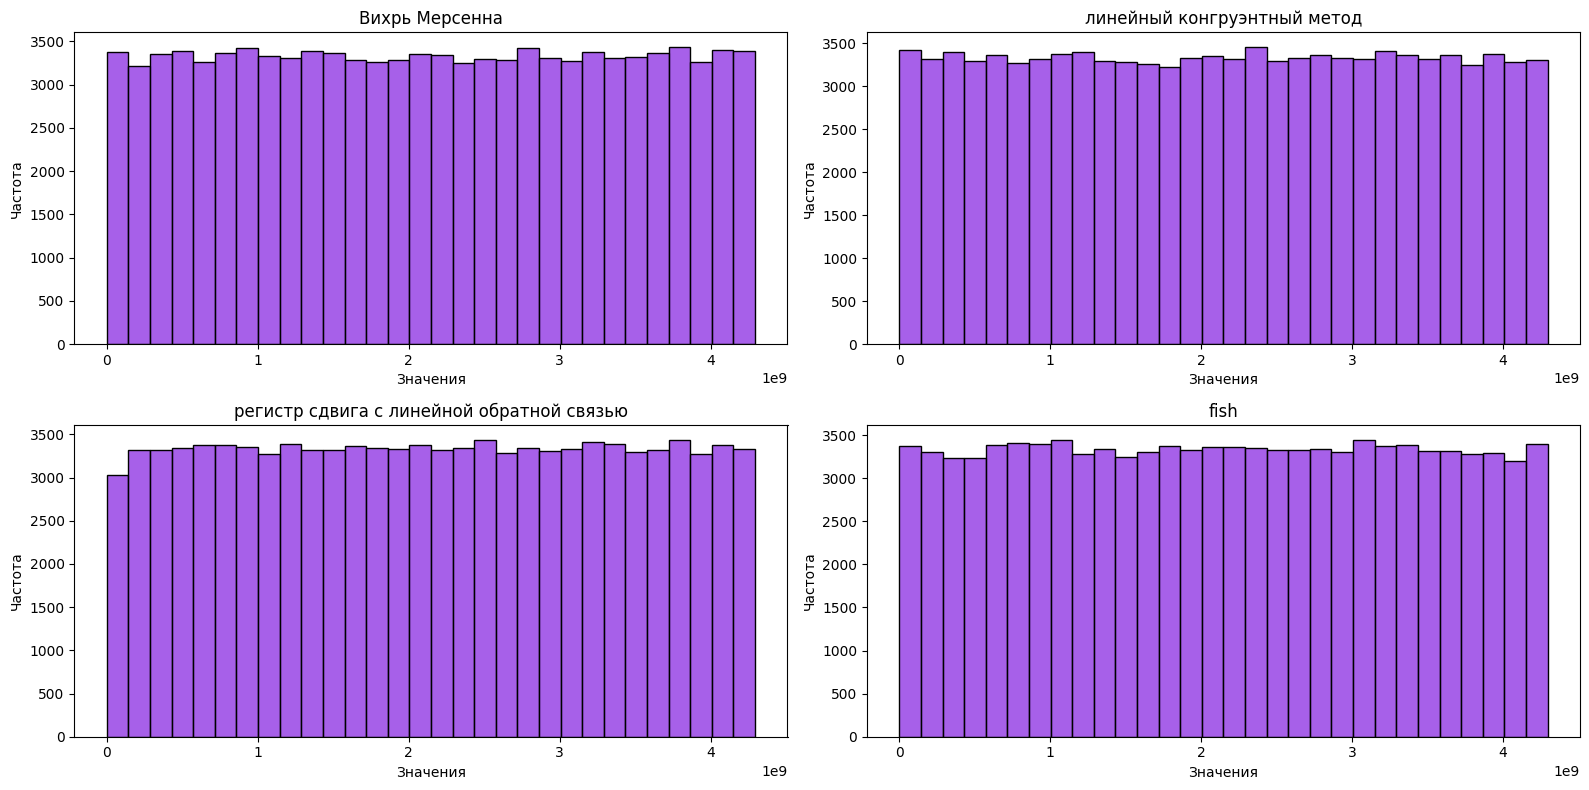

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette(["#8a2be2"])
# Настройка фигуры
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Названия графиков
titles = ["Вихрь Мерсенна", "линейный конгруэнтный метод", "регистр сдвига с линейной обратной связью", "fish"]

# Построение графиков
for i, ax in enumerate(axes.flat):
    sns.histplot(sequences[i], bins=30, kde=False, ax=ax,)
    ax.set_title(titles[i])  # Установка названия графика
    ax.set_xlabel("Значения")
    ax.set_ylabel("Частота")

# Настройка расстояний между графиками
plt.tight_layout()
plt.show()


Для каждого генератора рисуется график lineplot для первых 100 чисел

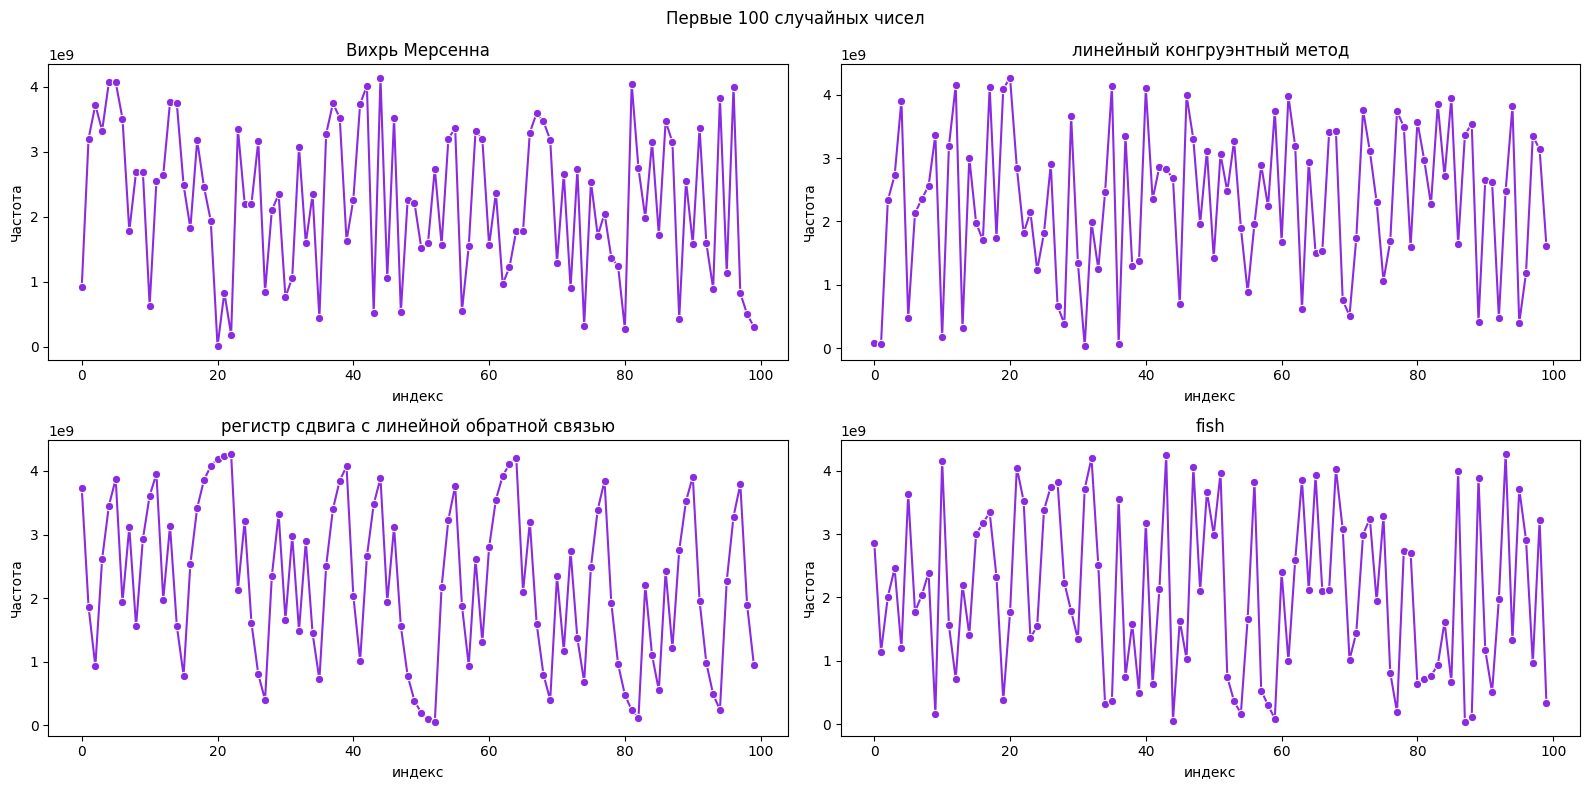

In [3]:
# Настройка фигуры
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
fig.suptitle("Первые 100 случайных чисел")
# Названия графиков
titles = ["Вихрь Мерсенна", "линейный конгруэнтный метод", "регистр сдвига с линейной обратной связью", "fish"]

# Построение графиков
for i, ax in enumerate(axes.flat):
    seq = sequences[i][:100]
    sns.lineplot(x=range(len(seq)),y=seq, ax=ax, marker = 'o')  
    ax.set_title(titles[i])  # Установка названия графика
    ax.set_xlabel("индекс")
    ax.set_ylabel("Частота")

# Настройка расстояний между графиками
plt.tight_layout()
plt.show()


Для каждого генератора рисуется гистограмма разностей сосдених элементов

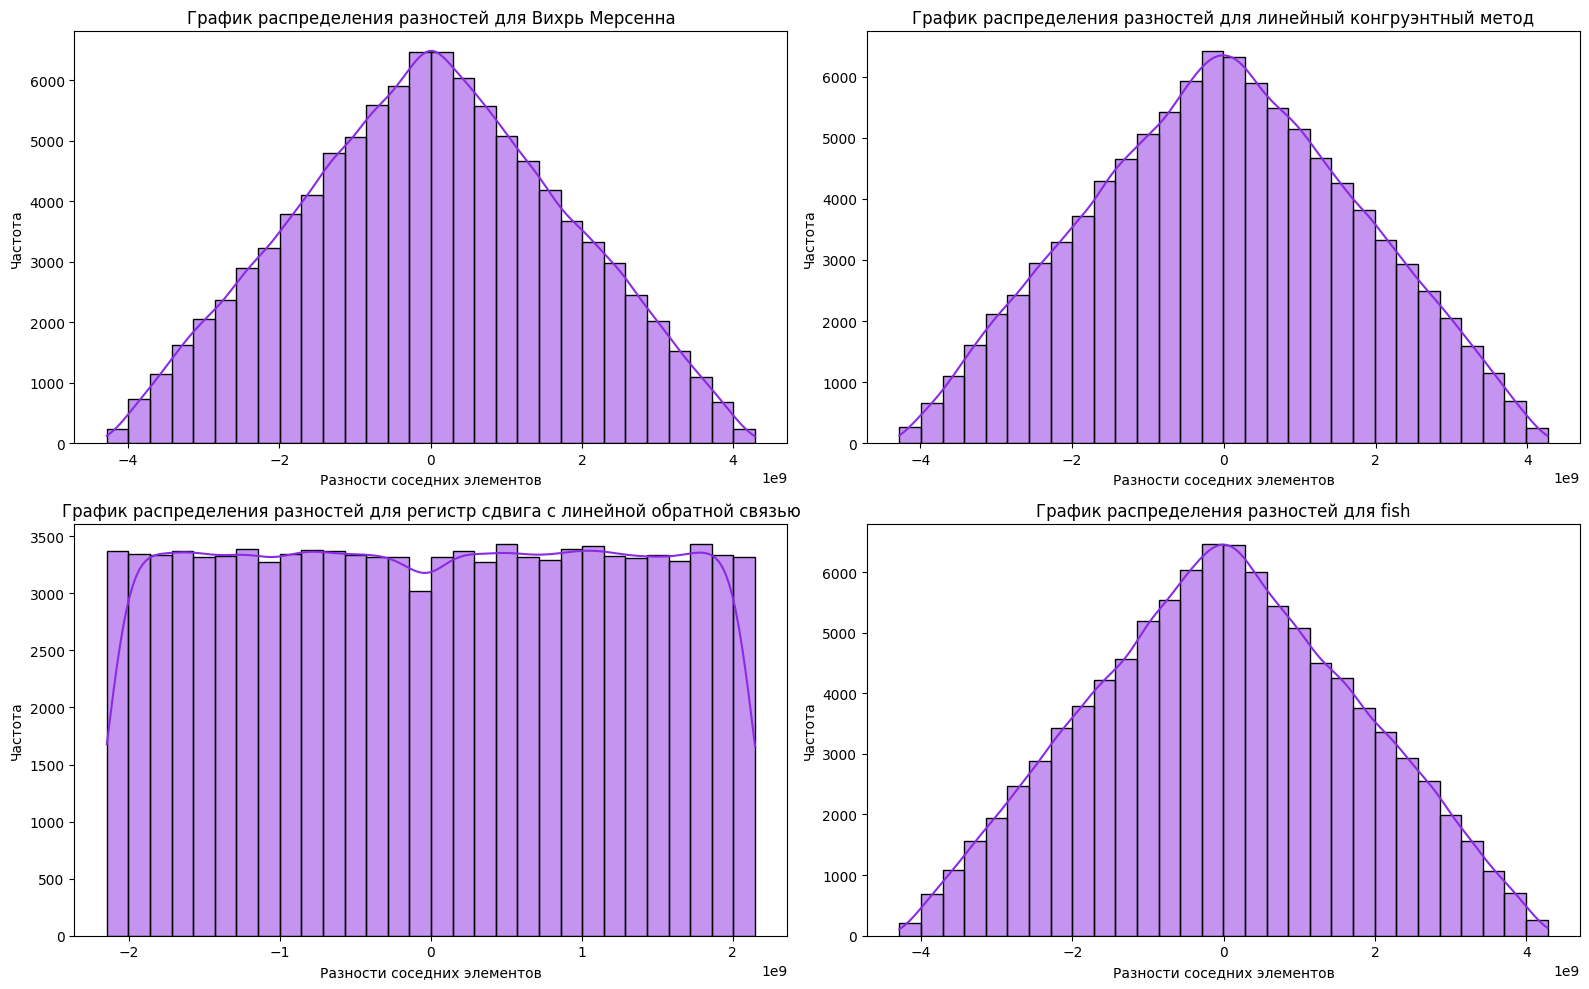

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(16, 10))
# Создание графиков
for i, seq in enumerate(sequences):
    plt.subplot(2, 2, i+1)
    
    # Вычисление разностей соседних элементов
    diffs = np.diff(seq)
    
    # Построение графика распределения разностей
    sns.histplot(diffs, kde=True, bins=30)
    plt.title(f'График распределения разностей для {titles[i]}')
    plt.xlabel('Разности соседних элементов')
    plt.ylabel('Частота')

# Отображение графиков
plt.tight_layout()
plt.show()


Для каждого генератора рисуется скаттер плот для i-го по горизонтали и для i+1-го по вертикали  

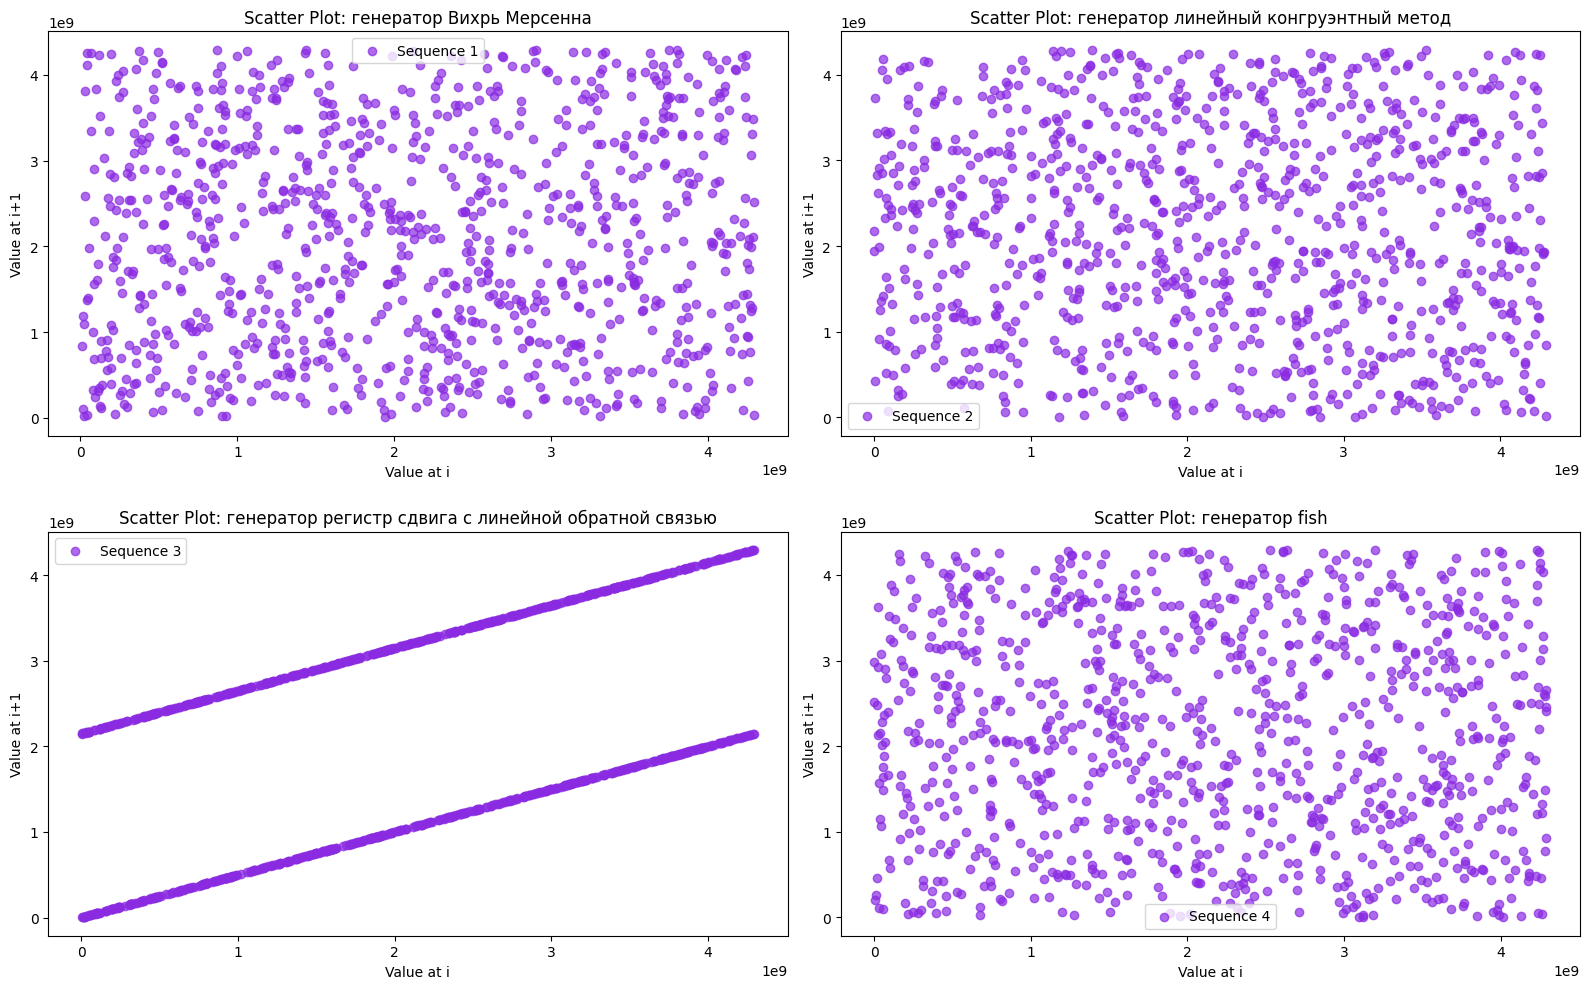

In [5]:

# Настроим фигуру
plt.figure(figsize=(16, 10))

# График 1: Скаттерплот соседних значений для каждого списка
for i, seq in enumerate(sequences):
    seq = seq[:1000]
    plt.subplot(2, 2, i+1)  # Размещение в 2x2 сетке
    plt.scatter(seq[:-1], seq[1:], label=f'Sequence {i+1}', alpha=0.7)
    plt.title(f'Scatter Plot: генератор {titles[i]}')
    plt.xlabel('Value at i')
    plt.ylabel('Value at i+1')
    plt.legend()

plt.tight_layout()
plt.show()


Берётся последний бит каждого числа чтобы преобразовать случайную 10-ричную в случайную 2-чную последовательность и проходятся несколько тестов NIST, такие как "тест на частоту битов", "тест на частоту битов в блоках", "тест на последовательно идущие биты"(частота переходов с 0 на 1, и с 1 на 0), "спектральный тест".

######################### Вихрь Мерсенна ################################
frequency_bit_test - p-value 0.7662725214830919
frequency_block_test - p-value 0.5449233343248542
test_runs - p-value 0.09133700545094858
spectral_test - p-value 0.36360747890411715 наблюдаемые пики 47483 ожидаемые пики 47500.0


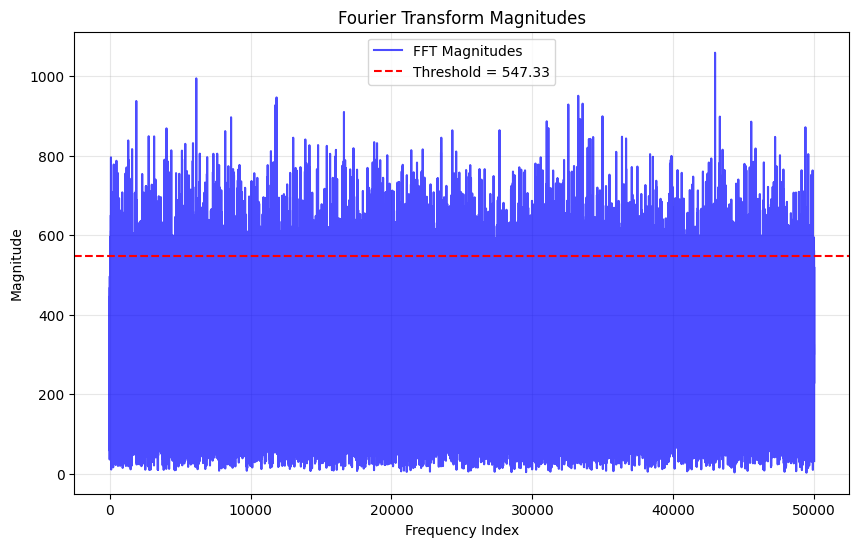

######################### линейный конгруэнтный метод ################################
frequency_bit_test - p-value 1.0
frequency_block_test - p-value 1.0
test_runs - p-value 0.0
spectral_test - p-value 0.0 наблюдаемые пики 50000 ожидаемые пики 47500.0


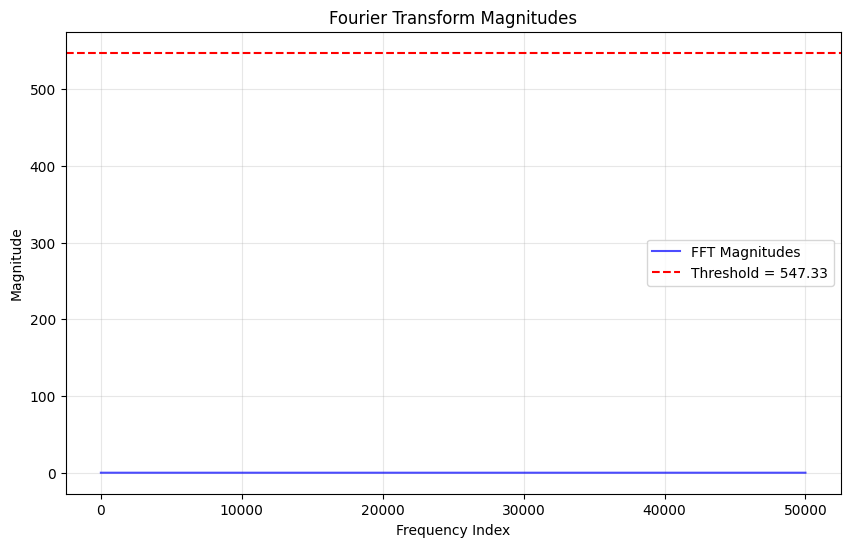

######################### регистр сдвига с линейной обратной связью ################################
frequency_bit_test - p-value 0.24198377184733508
frequency_block_test - p-value 0.9469994371777417
test_runs - p-value 0.25051674895088416
spectral_test - p-value 0.04427242668839219 наблюдаемые пики 47417 ожидаемые пики 47500.0


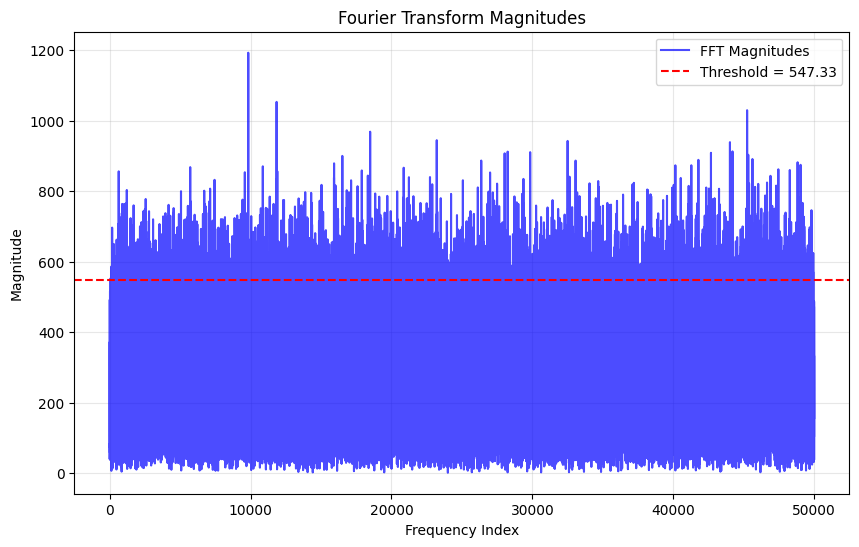

######################### fish ################################
frequency_bit_test - p-value 0.11676688733818198
frequency_block_test - p-value 0.24657479255489145
test_runs - p-value 0.5918563241420256
spectral_test - p-value 0.1383997662085269 наблюдаемые пики 47447 ожидаемые пики 47500.0


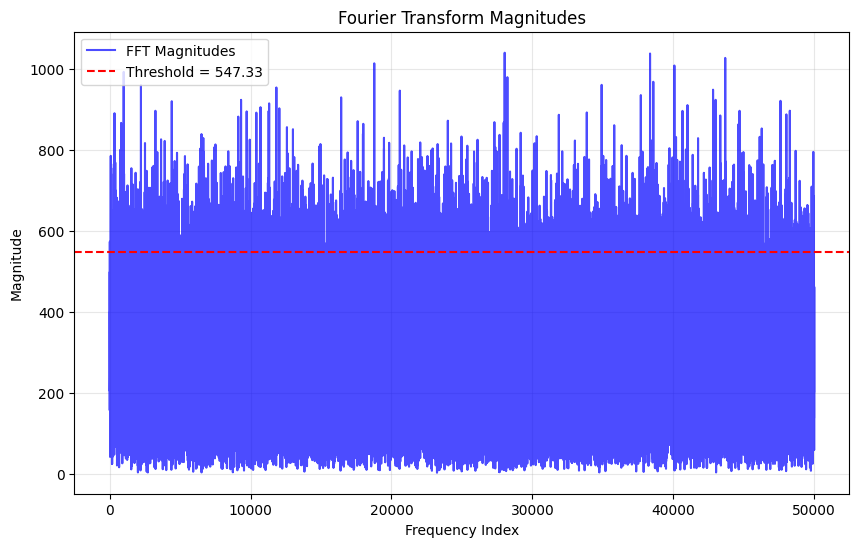

In [6]:
for i in range(4):
    seq = sequences[i]
    bits = ''.join([str(num & 1) for num in seq])
    print('#########################',titles[i],'################################')
    tests.print_all_tests(bits)


По пройденным тестам можно сделать выводы что в большинстве тество P-уровень значимости больше 0.05, из чего следует статистическая значимость нулевой гипотезы.